<a href="https://colab.research.google.com/github/rasoco/master_data_science/blob/master/Big%20Data/Clase%203/%20Big_Data_de_03_porting_to_spark_workingme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Porting an analysis from local to distributed

<a href = "http://yogen.io"><img src="http://yogen.io/assets/logo.svg" alt="yogen" style="width: 200px; float: right;"/></a>

Now comes the opportunity to put in practice what we have just learned!

### If you are running this notebook in Google Colab

Copy the following to a code cell and run it. It will install and set up Spark for you.

```python
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.uvigo.es/spark/spark-2.4.6/spark-2.4.6-bin-hadoop2.7.tgz
!tar -xf spark-2.4.6-bin-hadoop2.7.tgz
!pip install -q findspark

import os
import findspark
from pyspark.sql import SparkSession

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.6-bin-hadoop2.7"
findspark.init()
spark = SparkSession.builder.master("local[*]").getOrCreate()
```

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.uvigo.es/spark/spark-2.4.6/spark-2.4.6-bin-hadoop2.7.tgz
!tar -xf spark-2.4.6-bin-hadoop2.7.tgz
!pip install -q findspark pyspark==2.4.6
 
import os
import findspark
from pyspark.sql import SparkSession
 
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.6-bin-hadoop2.7"
findspark.init()
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Guided exercise

Recreate the boxplot we did in the pandas section, in Spark!

Since matplotlib boxplot needs all the data and that would be unfeasible with Big Data, we will calculate the quartiles ourselves.

Once the analysis is ported, we will be able to run it on the whole historical series! You can find it at https://transtats.bts.gov (On time performance reporting carrier).

##  Workflow

The basic idea is the same that we applied in the Amadeus Challenge:

* Build prototype with small data: in this section, we will be using `06-intro_to_pandas_practical.ipynb` as our already made prototype

* Modify your prototype so that it works with Big Data: In this case, it means porting it to Spark

* Test your "Big Data" prototype with small data: We will first test it with a sample locally, then upload it to a cluster and test it with Big Data. 

    * You can run your analyses building your own cluster and storage bucket in Google Cloud Storage. More in notebook #4!

* Run your prototype with Big Data.

    


1. Desarrollo prototipo
2. Modifico el prototipo 
3. Pruebo con el conjuto completo de los datos




## Conecting with drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Modify the prototype so that it works with Big Data

## Read csv

We'll use the `SparkSession.read.csv` method.

In [ ]:
df = spark.read.csv('/content/drive/My Drive/BigData Spark/Clase 1/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_12.csv.gz', header=True, inferSchema=True)

In [ ]:
df

DataFrame[Year: int, Quarter: int, Month: int, DayofMonth: int, DayOfWeek: int, FlightDate: timestamp, Reporting_Airline: string, DOT_ID_Reporting_Airline: int, IATA_CODE_Reporting_Airline: string, Tail_Number: string, Flight_Number_Reporting_Airline: int, OriginAirportID: int, OriginAirportSeqID: int, OriginCityMarketID: int, Origin: string, OriginCityName: string, OriginState: string, OriginStateFips: int, OriginStateName: string, OriginWac: int, DestAirportID: int, DestAirportSeqID: int, DestCityMarketID: int, Dest: string, DestCityName: string, DestState: string, DestStateFips: int, DestStateName: string, DestWac: int, CRSDepTime: int, DepTime: int, DepDelay: double, DepDelayMinutes: double, DepDel15: double, DepartureDelayGroups: int, DepTimeBlk: string, TaxiOut: double, WheelsOff: int, WheelsOn: int, TaxiIn: double, CRSArrTime: int, ArrTime: int, ArrDelay: double, ArrDelayMinutes: double, ArrDel15: double, ArrivalDelayGroups: int, ArrTimeBlk: string, Cancelled: double, Cancellati

In [ ]:
df.count()

593842

## Select relevant columns

Literally the same syntax as Pandas!

```python
df = df.select(['FlightDate', 'DayOfWeek', 'Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 'Origin', 
                'OriginCityName', 'OriginStateName', 'Dest', 'DestCityName', 'DestStateName',
                'DepTime', 'DepDelay', 'AirTime', 'Distance'])

df
```

In [ ]:
df = df.select(['FlightDate', 'DayOfWeek', 'Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 'Origin', 
                'OriginCityName', 'OriginStateName', 'Dest', 'DestCityName', 'DestStateName',
                'DepTime', 'DepDelay', 'AirTime', 'Distance'])
 
df

DataFrame[FlightDate: timestamp, DayOfWeek: int, Reporting_Airline: string, Tail_Number: string, Flight_Number_Reporting_Airline: int, Origin: string, OriginCityName: string, OriginStateName: string, Dest: string, DestCityName: string, DestStateName: string, DepTime: int, DepDelay: double, AirTime: double, Distance: double]

### Extract "Hour" variable

The DepTimes have been inferred to be floats. We need them as ints, representing each o fthe 24 hours in a day.

In [ ]:
df.select(df['DepTime']).show(10) #infiere como entero porque esta escrito con formato entero

+-------+
|DepTime|
+-------+
|   1048|
|    638|
|   1710|
|   1318|
|    953|
|   1646|
|   1813|
|   1450|
|    953|
|   1219|
+-------+
only showing top 10 rows



Variable discreta la hora

In [ ]:
from pyspark.sql import types #importar la libreria types
# (df['DepTime'] / 100) #esto es float 
df2 = df.withColumn('Hour', (df['DepTime'] / 100).cast(types.IntegerType())) #lo convierto como entero
df2.show(4)


+-------------------+---------+-----------------+-----------+-------------------------------+------+--------------+---------------+----+------------+-------------+-------+--------+-------+--------+----+
|         FlightDate|DayOfWeek|Reporting_Airline|Tail_Number|Flight_Number_Reporting_Airline|Origin|OriginCityName|OriginStateName|Dest|DestCityName|DestStateName|DepTime|DepDelay|AirTime|Distance|Hour|
+-------------------+---------+-----------------+-----------+-------------------------------+------+--------------+---------------+----+------------+-------------+-------+--------+-------+--------+----+
|2018-12-25 00:00:00|        2|               WN|     N566WN|                           1823|   OAK|   Oakland, CA|     California| GEG| Spokane, WA|   Washington|   1048|    18.0|  111.0|   723.0|  10|
|2018-12-25 00:00:00|        2|               WN|     N562WN|                            982|   OAK|   Oakland, CA|     California| HOU| Houston, TX|        Texas|    638|    -2.0|  204.0|

## Generate the relative distributions

In order to be able to handle the data, we need to reduce its dimensionality. Since we want to describe a discrete distribution, we can just count how many values of each level of the 'DepDelay' variable we find for each hour (24 different discrete distributions). We also want the totals in order to do the relative distribution.

1. Primero saco los totales de Horas con un groupby
2. Segundo saco los totales de Retraso con un groupby
3. Tercero hacemos un join

### Totals

In [ ]:
totals_per_hour = df2.groupBy('Hour').count()
totals_per_hour.show(5) #DepDelay esta en minutos

+----+-----+
|Hour|count|
+----+-----+
|  12|36925|
|  22|15646|
|null| 6526|
|   1|  846|
|  13|33163|
+----+-----+
only showing top 5 rows



In [ ]:
totals_per_hour.count()

26

### Distributions

In [ ]:
totals_per_delay_hour = df2.groupBy('DepDelay', 'Hour').count()
totals_per_delay_hour.show(5)

+--------+----+-----+
|DepDelay|Hour|count|
+--------+----+-----+
|     4.0|   8|  478|
|    10.0|  22|  177|
|   179.0|  15|    7|
|    25.0|   7|   75|
|    38.0|  18|  115|
+--------+----+-----+
only showing top 5 rows



In [ ]:
totals_per_delay_hour.count()

7361

Now we join both and calculate what fraction of the total for each hour each level of DepDelay represents.

In [ ]:
joined = totals_per_delay_hour.join(totals_per_hour, on='Hour')
joined.show()

+----+--------+-----+-----+
|Hour|DepDelay|count|count|
+----+--------+-----+-----+
|   8|     4.0|  478|36357|
|  22|    10.0|  177|15646|
|  15|   179.0|    7|35691|
|   7|    25.0|   75|35336|
|  18|    38.0|  115|33335|
|  17|    60.0|   53|36591|
|   7|    62.0|   14|35336|
|  16|   108.0|   16|34761|
|  22|   230.0|    1|15646|
|   9|   -14.0|  144|34355|
|   4|   -10.0|   51| 1374|
|  11|   177.0|    3|36740|
|   0|   -18.0|    3| 2283|
|  14|   172.0|    5|34619|
|   2|    82.0|    1|  276|
|  17|   184.0|    8|36591|
|   3|   157.0|    1|  200|
|   3|   -12.0|    5|  200|
|  21|   281.0|    2|19028|
|  23|   154.0|    4| 5835|
+----+--------+-----+-----+
only showing top 20 rows



In [ ]:
# relative_freq = joined.select('Hour',
#                               'DepDelay',
#                               totals_per_delay_hour['count'] / totals_per_hour['count']) #Para indicarle que count quieres
# relative_freq


In [ ]:
relative_freq = joined.select('Hour',
                              'DepDelay',
                             (totals_per_delay_hour['count'] / totals_per_hour['count']).alias('relative_freq')).cache() #recordar que el cache es para que no sea aleatorio

In [ ]:
relative_freq.show(10)

+----+--------+--------------------+
|Hour|DepDelay|       relative_freq|
+----+--------+--------------------+
|   8|     4.0|0.013147399400390572|
|  22|    10.0|0.011312795602709957|
|  15|   179.0|1.961278753747443...|
|   7|    25.0|0.002122481322164365|
|  18|    38.0|0.003449827508624...|
|  17|    60.0|0.001448443606351...|
|   7|    62.0|3.961965134706815E-4|
|  16|   108.0|4.602859526480826E-4|
|  22|   230.0|6.391409945033875E-5|
|   9|   -14.0|0.004191529617231844|
+----+--------+--------------------+
only showing top 10 rows



De los vuelos que salen a 16, un 0'0004 % sale con un 108 minutos de retraso

Tenemos que explicar a Spark cual es el tipo de retorno de tuples, si no le explica no sabe explicarlo. 
Esto es un tupla de dos elementos, primero es un doble y el segundo también. Tipado dinamico (Python) esto puedo parece chorrada
Tipado estatico que hay por debajo (Java)
returnType=types.StructType significa que es una tupla de dos elementos

In [ ]:
# from pyspark.sql import types, functions 

# def tupleize(a,b): return a, b # me devuelve una tupla de python

# tupleize_udf = functions.udf(tupleize)

# relative_freq.withColumn('tuples', tupleize_udf('DepDelay', 'relative_freq')).show()

#Tenemos que explicar a Spark cual es el tipo de retorno de tuples, si no le explica no sabe explicarlo. 
# Esto es un tupla de dos elementos, primero es un doble y el segundo también. Tipado dinamico (Python) esto puedo parece chorrada
# Tipado estatico que hay por debajo (Java)
# returnType=types.StructType significa que es una tupla de dos elementos

+----+--------+--------------------+--------------------+
|Hour|DepDelay|       relative_freq|              tuples|
+----+--------+--------------------+--------------------+
|   8|     4.0|0.013147399400390572|[Ljava.lang.Objec...|
|  22|    10.0|0.011312795602709957|[Ljava.lang.Objec...|
|  15|   179.0|1.961278753747443...|[Ljava.lang.Objec...|
|   7|    25.0|0.002122481322164365|[Ljava.lang.Objec...|
|  18|    38.0|0.003449827508624...|[Ljava.lang.Objec...|
|  17|    60.0|0.001448443606351...|[Ljava.lang.Objec...|
|   7|    62.0|3.961965134706815E-4|[Ljava.lang.Objec...|
|  16|   108.0|4.602859526480826E-4|[Ljava.lang.Objec...|
|  22|   230.0|6.391409945033875E-5|[Ljava.lang.Objec...|
|   9|   -14.0|0.004191529617231844|[Ljava.lang.Objec...|
|   4|   -10.0| 0.03711790393013101|[Ljava.lang.Objec...|
|  11|   177.0|8.165487207403376E-5|[Ljava.lang.Objec...|
|   0|   -18.0|0.001314060446780552|[Ljava.lang.Objec...|
|  14|   172.0|1.444293596002195...|[Ljava.lang.Objec...|
|   2|    82.0

Aquí le explicamos a Java que es una tupla. UserDefinedFuncionts(udf)

In [ ]:
from pyspark.sql import types, functions 

def tupleize(a,b): return a, b

tupleize_udf = functions.udf(tupleize, returnType=types.StructType([types.StructField('a', types.DoubleType()),
                                                                    types.StructField('b', types.DoubleType() )]))

tupled = relative_freq.withColumn('tuples', tupleize_udf('DepDelay', 'relative_freq'))
tupled.printSchema()
tupled.show()

root
 |-- Hour: integer (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- relative_freq: double (nullable = true)
 |-- tuples: struct (nullable = true)
 |    |-- a: double (nullable = true)
 |    |-- b: double (nullable = true)

+----+--------+--------------------+--------------------+
|Hour|DepDelay|       relative_freq|              tuples|
+----+--------+--------------------+--------------------+
|   8|     4.0|0.013147399400390572|[4.0, 0.013147399...|
|  22|    10.0|0.011312795602709957|[10.0, 0.01131279...|
|  15|   179.0|1.961278753747443...|[179.0, 1.9612787...|
|   7|    25.0|0.002122481322164365|[25.0, 0.00212248...|
|  18|    38.0|0.003449827508624...|[38.0, 0.00344982...|
|  17|    60.0|0.001448443606351...|[60.0, 0.00144844...|
|   7|    62.0|3.961965134706815E-4|[62.0, 3.96196513...|
|  16|   108.0|4.602859526480826E-4|[108.0, 4.6028595...|
|  22|   230.0|6.391409945033875E-5|[230.0, 6.3914099...|
|   9|   -14.0|0.004191529617231844|[-14.0, 0.0041915...|
|   

In [ ]:
distributions = tupled.groupby('Hour').agg(functions.collect_list('tuples')) 
#functions collect_list: empalmar las tuplas en forma de listas
distributions.show()
# Representa la coleccion de la hora 12, depdelay y el porcentaje de retraso
# los vuelos de 1 am, los que han salido con 87 minutos con retraso representa 0.03%

+----+--------------------+
|Hour|collect_list(tuples)|
+----+--------------------+
|  12|[[313.0, 2.708192...|
|  22|[[10.0, 0.0113127...|
|   1|[[87.0, 0.0035460...|
|  13|[[77.0, 9.0462262...|
|  16|[[108.0, 4.602859...|
|   6|[[740.0, 2.673939...|
|   3|[[157.0, 0.005], ...|
|  20|[[206.0, 7.053678...|
|   5|[[43.0, 1.3276098...|
|  19|[[287.0, 3.229348...|
|  15|[[179.0, 1.961278...|
|  17|[[60.0, 0.0014484...|
|   9|[[-14.0, 0.004191...|
|   4|[[-10.0, 0.037117...|
|   8|[[4.0, 0.01314739...|
|  23|[[154.0, 6.855184...|
|   7|[[25.0, 0.0021224...|
|  10|[[202.0, 8.670520...|
|  24|[[-5.0, 0.025], [...|
|  21|[[281.0, 1.051082...|
+----+--------------------+
only showing top 20 rows



In [ ]:
distributions.toPandas()

,Hour,collect_list(tuples)
0,12,"[(313.0, 2.7081922816519974e-05), (-6.0, 0.062..."
1,22,"[(10.0, 0.011312795602709957), (230.0, 6.39140..."
2,1,"[(87.0, 0.0035460992907801418), (437.0, 0.0011..."
3,13,"[(77.0, 0.0009046226215963574), (165.0, 9.0462..."
4,16,"[(108.0, 0.0004602859526480826), (672.0, 2.876..."
5,6,"[(740.0, 2.6739397828760897e-05), (38.0, 0.000..."
6,3,"[(157.0, 0.005), (-12.0, 0.025), (-17.0, 0.005..."
7,20,"[(206.0, 7.053678493334273e-05), (211.0, 0.000..."
8,5,"[(43.0, 0.00013276098597158915), (-3.0, 0.1072..."
9,19,"[(287.0, 3.229348317509527e-05), (18.0, 0.0066..."


### Generate distributions

We have to group on the hour. Each group will be a bunch of delays and the corresponding frequencies.

These groups are definitely manageable: the number of levels will be on the order of a few hundreds to a couple thousands. We can combine them into lists straight away. Primero tupla, lista de tuplas, udf para ordenarlas

Now it's be easy to use a UDF to merge the two lists and sort them.

Careful! If we keep that string return type, it might be problematic later.

In [ ]:
from pyspark.sql import types, functions 

def tupleize(a,b): return a, b

tupleize_udf = functions.udf(tupleize, returnType=types.StructType([types.StructField('a', types.DoubleType()),
                                                                    types.StructField('b', types.DoubleType() )]))

tupled = relative_freq.withColumn('tuples', tupleize_udf('DepDelay', 'relative_freq'))
tupled.printSchema()
tupled.show()

### Calculating the quartiles

We are finally ready to calculate the quartiles! We will use a UDF.

The input to our custom function will be one of the distributions coded like we did: as a list of tuples `(value, relative_frequency)`. The quartiles are defined as the values at which we cross the 0.0, .25, .5, .75 and 1.00 relative frequencies. Since the distributions are ordered, we can just iterate over one while keeping track of what portion of the total distribution we have seen, and annotate where we cross the thresholds.

In [ ]:
import random

delays = list(range(-20, 20, 2))
random.shuffle(delays)
delays

[18,
 10,
 -18,
 -6,
 -20,
 -12,
 -14,
 0,
 -16,
 -10,
 14,
 -2,
 -8,
 16,
 -4,
 4,
 12,
 8,
 6,
 2]

In [ ]:
ns = [ random.randint(0, 5000) for _ in delays]
rel_freqs = [n / sum(ns) for n in ns]
rel_freqs

[0.07702608504237443,
 0.014858568441134387,
 0.0731555196830172,
 0.03006567120372748,
 0.07311883185970576,
 0.056627655281212164,
 0.003943941005980115,
 0.011721759548006017,
 0.08484059140771177,
 0.008584950654877646,
 0.074091059177459,
 0.04918002714898925,
 0.055453644935245995,
 0.04646512822394247,
 0.07873206882635653,
 0.036871262428000144,
 0.009703929265876656,
 0.08085996257842022,
 0.05231683604211762,
 0.0823825072458451]

In [ ]:
distribution = list(zip(delays, rel_freqs))
distribution

[(18, 0.07702608504237443),
 (10, 0.014858568441134387),
 (-18, 0.0731555196830172),
 (-6, 0.03006567120372748),
 (-20, 0.07311883185970576),
 (-12, 0.056627655281212164),
 (-14, 0.003943941005980115),
 (0, 0.011721759548006017),
 (-16, 0.08484059140771177),
 (-10, 0.008584950654877646),
 (14, 0.074091059177459),
 (-2, 0.04918002714898925),
 (-8, 0.055453644935245995),
 (16, 0.04646512822394247),
 (-4, 0.07873206882635653),
 (4, 0.036871262428000144),
 (12, 0.009703929265876656),
 (8, 0.08085996257842022),
 (6, 0.05231683604211762),
 (2, 0.0823825072458451)]

In [ ]:
sorted(distribution)

[(-20, 0.07311883185970576),
 (-18, 0.0731555196830172),
 (-16, 0.08484059140771177),
 (-14, 0.003943941005980115),
 (-12, 0.056627655281212164),
 (-10, 0.008584950654877646),
 (-8, 0.055453644935245995),
 (-6, 0.03006567120372748),
 (-4, 0.07873206882635653),
 (-2, 0.04918002714898925),
 (0, 0.011721759548006017),
 (2, 0.0823825072458451),
 (4, 0.036871262428000144),
 (6, 0.05231683604211762),
 (8, 0.08085996257842022),
 (10, 0.014858568441134387),
 (12, 0.009703929265876656),
 (14, 0.074091059177459),
 (16, 0.04646512822394247),
 (18, 0.07702608504237443)]

Crear una función que funciona como distribución 

In [ ]:
def quartiles(distribution):
    result = []
    acc = 0.0 
  
    for delay, rel_freq in sorted(distribution):
      prev = acc # para saber si me paso, me guardo el valor
      acc += rel_freq #tengo que ver si en este paso al incrementar he pasado una de mis barrera. 

      if prev == 0.0 and acc > 0.0:
        result.append(delay) #minimo

      if prev <= .25 and acc > .25:
        result.append(delay)

      if prev <= .50 and acc > .50:
        result.append(delay)

      if prev <= .75 and acc > .75:
        result.append(delay)

    result.append(delay)

    return result

#empaquetaremos en udf y lo utilizaremos

In [ ]:
quartiles(distribution)

[-20, -12, -2, 8, 18]

In [ ]:
quartiles_udf = functions.udf(quartiles)

Apply to the dataframe:

In [ ]:
calculated_quartiles = distributions.select('Hour', quartiles_udf('collect_list(tuples)'))
calculated_quartiles.printSchema()
calculated_quartiles.show()

root
 |-- Hour: integer (nullable = true)
 |-- quartiles(collect_list(tuples)): string (nullable = true)

+----+-------------------------------+
|Hour|quartiles(collect_list(tuples))|
+----+-------------------------------+
|  12|           [-38.0, -5.0, -2....|
|  22|           [-39.0, -5.0, 0.0...|
|   1|           [-22.0, -3.0, 13....|
|  13|           [-32.0, -5.0, -2....|
|  16|           [-37.0, -5.0, -1....|
|   6|           [-32.0, -6.0, -3....|
|   3|           [-19.0, -6.0, -1....|
|  20|           [-35.0, -5.0, 0.0...|
|   5|           [-24.0, -7.0, -4....|
|  19|           [-32.0, -5.0, -1....|
|  15|           [-60.0, -5.0, -2....|
|  17|           [-46.0, -5.0, -2....|
|   9|           [-31.0, -6.0, -3....|
|   4|           [-23.0, -7.0, -5....|
|   8|           [-72.0, -6.0, -3....|
|  23|           [-30.0, -4.0, 14....|
|   7|           [-28.0, -6.0, -3....|
|  10|           [-26.0, -5.0, -2....|
|  24|           [-7.0, 1.0, 35.0,...|
|  21|           [-39.0, -5.0, 0.0..

### Plotting

We got it! Let's move this over to Pandas for convenient handling

In [ ]:
pd_df = calculated_quartiles.toPandas()
pd_df.head()

,Hour,quartiles(collect_list(tuples))
0,12,"[-38.0, -5.0, -2.0, 6.0, 1371.0]"
1,22,"[-39.0, -5.0, 0.0, 22.0, 953.0]"
2,1,"[-22.0, -3.0, 13.0, 111.0, 1154.0]"
3,13,"[-32.0, -5.0, -2.0, 9.0, 1185.0]"
4,16,"[-37.0, -5.0, -1.0, 10.0, 672.0]"


And we are ready to plot!

Función eval: Coge un string, contiene codigo python y evalua el codigo python

In [ ]:
eval(' 2 * 2')

4

In [ ]:
for hour in pd_df['quartiles(collect_list(tuples))']:
  print(eval(hour))

[-38.0, -5.0, -2.0, 6.0, 1371.0]
[-39.0, -5.0, 0.0, 22.0, 953.0]
[-22.0, -3.0, 13.0, 111.0, 1154.0]
[-32.0, -5.0, -2.0, 9.0, 1185.0]
[-37.0, -5.0, -1.0, 10.0, 672.0]
[-32.0, -6.0, -3.0, -1.0, 1229.0]
[-19.0, -6.0, -1.0, 30.0, 596.0]
[-35.0, -5.0, 0.0, 19.0, 865.0]
[-24.0, -7.0, -4.0, -2.0, 1320.0]
[-32.0, -5.0, -1.0, 15.0, 847.0]
[-60.0, -5.0, -2.0, 10.0, 1339.0]
[-46.0, -5.0, -2.0, 10.0, 1789.0]
[-31.0, -6.0, -3.0, 2.0, 1415.0]
[-23.0, -7.0, -5.0, -3.0, 485.0]
[-72.0, -6.0, -3.0, 0.0, 1407.0]
[-30.0, -4.0, 14.0, 62.0, 1036.0]
[-28.0, -6.0, -3.0, 0.0, 1076.0]
[-26.0, -5.0, -2.0, 5.0, 1307.0]
[-7.0, 1.0, 35.0, 110.0, 480.0]
[-39.0, -5.0, 0.0, 27.0, 954.0]
[-45.0, -5.0, -2.0, 5.0, 1317.0]
[-32.0, -5.0, -2.0, 10.0, 1435.0]
[-24.0, -5.0, 28.0, 136.0, 658.0]
[-20.0, -4.0, 11.0, 89.0, 2098.0]
[-40.0, -5.0, -1.0, 14.0, 1439.0]


In [ ]:
xs = []
ys = []

for _, hour, quartiles in pd_df.itertuples():

  for q in eval(quartiles):
    xs.append(hour)
    ys.append(q)

(-20.0, 100.0)

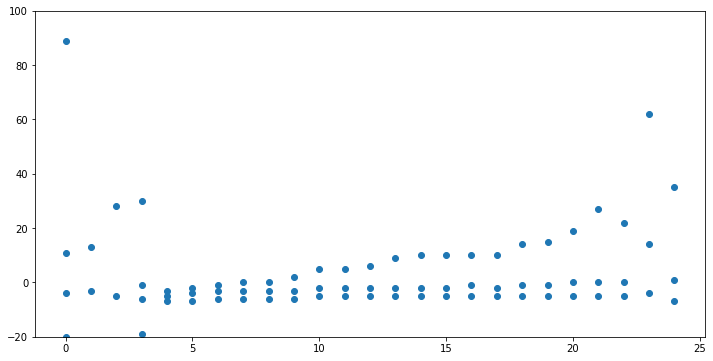

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(xs, ys)
plt.gcf().set_size_inches(12, 6)
plt.gca().set_ylim(-20, 100)

Diciembre 2018 en concreto, cuando sale el sol todo esta bajo control, los vuelos salen antes de tiempo. Un retraso a las nueve provoca los siguientes retrasos 

Work flow desarrollar un prototipo, adaptamos el prototipo para que funcione con Big Data y lo corremos con el small data y lo pasamos a Big Data. 

Coger esto y empaquetarlo

## Test your "Big Data" prototype with small data

### Summary

This is the whole process, collected in one place as is:

### Pyspark job

In order to run the process in a cluster, we need to transform it into a pyspark job file. 

We need to tidy up the function definitions, add the relevant imports, and modify the input and output to use command-line arguments.

We will put the result in a file called mysparkjob.py:

```python
from __future__ import print_function
from pyspark.sql import types, functions, SparkSession
import sys

def zipsort(a, b):
    return sorted(zip(a, b))

def quartiles(histogram):
    area = 0
    result = []
    
    for value, percentage in histogram:
        if area == 0:
            result.append(value)
        elif area <= .25 and area + percentage > .25:
            result.append(value)
        elif area <= .5 and area + percentage > .5:
            result.append(value)
        elif area <= .75 and area + percentage > .75:
            result.append(value)
        area += percentage
    
    result.append(value)
    return result

if __name__=='__main__':
    
    file = sys.argv[1]
    out = sys.argv[2]
    
    spark = SparkSession.builder.getOrCreate()
    df = spark.read.csv(file, header= True, inferSchema=True)
    df = df.select(['FlightDate', 'DayOfWeek', 'Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 'Origin', 
                    'OriginCityName', 'OriginStateName', 'Dest', 'DestCityName', 'DestStateName',
                    'DepTime', 'DepDelay', 'AirTime', 'Distance'])

    df2 = df.withColumn('Hour', (df['DepTime'] / 100).cast(types.IntegerType()))
    totals = df2.groupBy('Hour').count()
    distributions = df2.groupBy(['Hour', 'DepDelay']).count()
    annotated = distributions.join(totals, on='Hour')
    frequencies = annotated.withColumn('relative', distributions['count'] / totals['count'])
    groups = frequencies.groupBy(totals['Hour'])\
                        .agg(functions.collect_list('DepDelay').alias('delays'),
                             functions.collect_list('relative').alias('relatives'))



    zipsort_typed = functions.udf(zipsort, types.ArrayType(types.ArrayType(types.FloatType())))
    distributions = groups.withColumn('distributions', zipsort_typed('delays', 'relatives'))



    quartiles_udf = functions.udf(quartiles, returnType=types.ArrayType(types.FloatType()))

    result = distributions.select('Hour',
                                  quartiles_udf('distributions').alias('quartiles'))

    result.write.json(out)
    spark.stop()
```

## **Small Data a Big Data**

1. Importamos librerias
2. Defino funciones
3. Código 
4. Empaquetamos el codigo en un Archivo .py 
5. Ejecutamos
      * Nos cuenta lo que esta pasando
      * Archivo de salida, es un directorio por el nombre que le he dado, cada uno de los elementos. En un nodo de colab. Antes de meternos en el cluster es comprobar que funciona

In [ ]:
from __future__ import print_function
from pyspark.sql import types, functions, SparkSession
import sys
 
def zipsort(a, b):
    return sorted(zip(a, b))
 
def quartiles(histogram):
    area = 0
    result = []
 
    for value, percentage in histogram:
        if area == 0:
            result.append(value)
        elif area <= .25 and area + percentage > .25:
            result.append(value)
        elif area <= .5 and area + percentage > .5:
            result.append(value)
        elif area <= .75 and area + percentage > .75:
            result.append(value)
        area += percentage
 
    result.append(value)
    return result
 
if __name__=='__main__': # se ejecuta el script no importando modulo 
 
    file = sys.argv[1] #tomo como un argumento, argumentos de la linea de comandos sys.
    out = sys.argv[2]
 
    spark = SparkSession.builder.getOrCreate()
    df = spark.read.csv(file, header= True, inferSchema=True)
    df = df.select(['FlightDate', 'DayOfWeek', 'Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 'Origin', 
                    'OriginCityName', 'OriginStateName', 'Dest', 'DestCityName', 'DestStateName',
                    'DepTime', 'DepDelay', 'AirTime', 'Distance'])
 
    df2 = df.withColumn('Hour', (df['DepTime'] / 100).cast(types.IntegerType()))
    totals = df2.groupBy('Hour').count()
    distributions = df2.groupBy(['Hour', 'DepDelay']).count()
    annotated = distributions.join(totals, on='Hour')
    frequencies = annotated.withColumn('relative', distributions['count'] / totals['count'])
    groups = frequencies.groupBy(totals['Hour'])\
                        .agg(functions.collect_list('DepDelay').alias('delays'),
                             functions.collect_list('relative').alias('relatives'))
 
 
 
    zipsort_typed = functions.udf(zipsort, types.ArrayType(types.ArrayType(types.FloatType())))
    distributions = groups.withColumn('distributions', zipsort_typed('delays', 'relatives'))
 
 
 
    quartiles_udf = functions.udf(quartiles, returnType=types.ArrayType(types.FloatType()))
 
    result = distributions.select('Hour',
                                  quartiles_udf('distributions').alias('quartiles'))
 
    result.write.json(out) #escrito en json por el valor de retorno de quariles es array y el formato de escritura csv no soporta, por eso json
    spark.stop()

### Running with spark-submit

If the following works, we are ready to test it in the cluster!

```python
spark-submit mysparkjob.py On_Time_On_Time_Performance_2015_8.csv out.json

```
spark-submit: enviarlo a spark
mysparkjob.py: archivo del codigo

On_Time_On_Time_Performance_2015_8.csv: nombre del archivo a leer

out.json: salida

Spark: es un traile o barco de contenadores, una vez que esta en marcha procesa un monton de cosa. Para jobs corto es mas lento. Para cluster va rapido